### Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


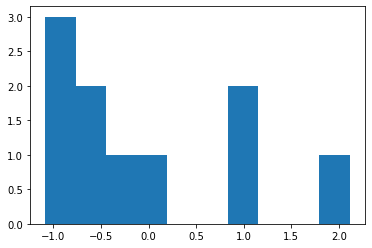

In [6]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [8]:
np.sign(0)

0

In [9]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W
gradient_descent_reg_l1

<function __main__.gradient_descent_reg_l1(X, y, iterations, eta=0.0001, reg=1e-08)>

In [12]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)
gradient_descent_reg_l1

Iter: 0, weights: [ 1.79599868  1.84268964 -0.16024098  0.89399678], error 3235.712032321236
Iter: 500, weights: [56.49275603  6.01745801  0.8646126   5.58912476], error 25.165088516401106
Iter: 1000, weights: [56.49499991  6.20845814  0.07944665  6.21017292], error 24.93843961167135
Iter: 1500, weights: [56.495       6.25610018 -0.16506435  6.41878591], error 24.911021177756833
Iter: 2000, weights: [56.495       6.27305654 -0.24935946  6.48884319], error 24.90662568169062
Iter: 2500, weights: [56.495       6.27932644 -0.27975311  6.51395451], error 24.90565961333161
Iter: 3000, weights: [56.495       6.28159176 -0.29069572  6.52298773], error 24.90539178288202
Iter: 3500, weights: [56.495       6.28240758 -0.29463456  6.52623889], error 24.905305735524234
Iter: 4000, weights: [56.495       6.28270125 -0.29605232  6.5274091 ], error 24.905276105434453
Iter: 4500, weights: [56.495       6.28280696 -0.29656263  6.5278303 ], error 24.905265614203397
Final MSE: 24.905261860500147


<function __main__.gradient_descent_reg_l1(X, y, iterations, eta=0.0001, reg=1e-08)>

### *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [15]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std
standard_scale

<function __main__.standard_scale(X)>

In [16]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
min_max_scale

<function __main__.min_max_scale(X)>

In [17]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [18]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [19]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [20]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

### *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [35]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=3)
display(X, Y, coef)

array([[-0.20259567, -1.12157117,  0.02082606, ..., -0.22783654,
         1.62401666, -1.9410217 ],
       [-0.13651064,  0.10715085, -0.27294905, ...,  0.10409138,
         0.86289907, -0.77960489],
       [-0.73603127,  0.08061562, -0.22897477, ..., -0.49945357,
         0.46113954,  0.50442611],
       ...,
       [-0.88208526, -1.55619169,  0.64159957, ..., -1.12015041,
         1.25701543, -0.07709315],
       [ 0.3758686 ,  0.94993092,  1.18370487, ..., -0.15600323,
        -0.11738392, -0.17335666],
       [-1.50460961, -0.28510986, -0.21532418, ...,  0.70524059,
         0.01654709,  0.75014394]])

array([-220.07943579,   24.27709602, -160.02788921, ...,  -68.81026524,
       -159.36453907,  -51.97926875])

array([85.78172715,  0.        ,  0.        ,  0.        , 79.74299838,
        8.66229707, 14.48603402,  0.        ,  0.        , 58.2368395 ,
       18.47080248, 67.49403877,  0.        , 84.66828475, 61.90268792,
        0.        ,  0.        , 81.92222844,  0.        ,  0.        ])

In [36]:
X = standard_scale(X)
X

array([[-0.20422782, -1.12162261,  0.0197294 , ..., -0.2307994 ,
         1.61953788, -1.94677545],
       [-0.13779296,  0.1067357 , -0.27437447, ...,  0.10083395,
         0.86144421, -0.78399154],
       [-0.74048717,  0.08020832, -0.23035097, ..., -0.5021754 ,
         0.46128087,  0.50155089],
       ...,
       [-0.8873143 , -1.55611449,  0.64119762, ..., -1.12232141,
         1.25399474, -0.08065288],
       [ 0.37729858,  0.94926631,  1.18390959, ..., -0.15902985,
        -0.11494411, -0.1770297 ],
       [-1.51313401, -0.2854089 , -0.2166851 , ...,  0.70144967,
         0.01845479,  0.74755796]])

In [37]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1])
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [38]:
# стохастический градиентный спуск
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list
stohastic_gradient_descent

<function __main__.stohastic_gradient_descent(W, X, Y, iterations, eta=0.0001, size=1)>

In [39]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list
gradient_descent

<function __main__.gradient_descent(W, X, y, iterations, eta=0.0001)>

In [40]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 39657.19529099856
Iter: 500, error 5376.649626347927
Iter: 1000, error 749.0950742968753
Iter: 1500, error 124.0711195627932
Iter: 2000, error 39.605024903878885
Iter: 2500, error 28.183923525609956
Iter: 3000, error 26.638767277796152
Iter: 3500, error 26.42960925320803
Iter: 4000, error 26.40128143731146
Iter: 4500, error 26.397442715409227
Final MSE: 26.396922247887268
CPU times: total: 1min 45s
Wall time: 55.2 s


In [41]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 26.40334904559339
Iter: 500, error 27.12612820317071
Iter: 1000, error 26.87894118162797
Iter: 1500, error 26.722135809106067
Iter: 2000, error 27.136100576336073
Iter: 2500, error 27.034325829491173
Iter: 3000, error 27.092480348771442
Iter: 3500, error 27.01617172988032
Iter: 4000, error 26.985874468869778
Iter: 4500, error 26.94768206705188
Final MSE: 26.57883445871328
CPU times: total: 20.4 s
Wall time: 7.24 s


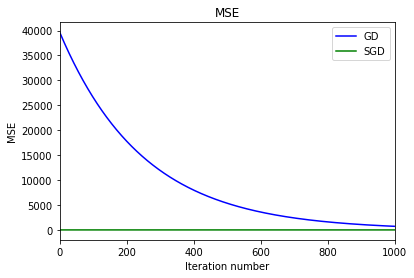

In [42]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [43]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

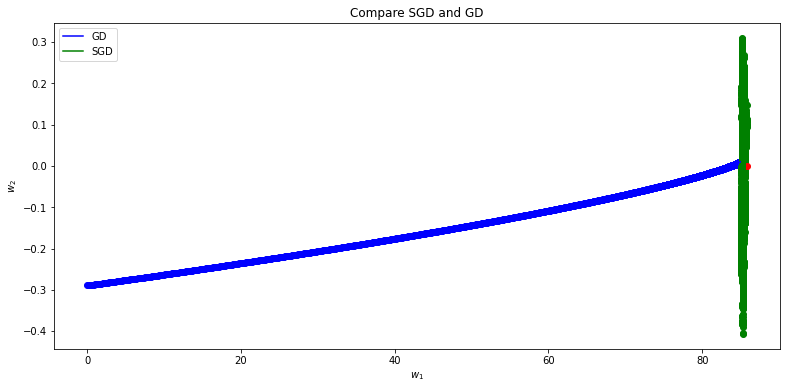

In [44]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()

In [45]:
X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [46]:
X = standard_scale(X)
X

array([[-0.71992944, -1.0937717 , -0.73933782, ..., -0.09104261,
         0.77063951, -0.53258505],
       [-0.22045254, -0.43999016,  1.17673967, ..., -0.44101842,
         0.65766002, -0.53963117],
       [-0.09410639, -0.04870816,  0.58073612, ..., -0.63930411,
         1.28840434, -0.34869766],
       ...,
       [-0.17427405,  1.2028528 ,  0.77067485, ...,  1.78665366,
        -0.59173305, -0.67780013],
       [ 0.93740725, -0.0535872 ,  1.4589974 , ..., -1.01639346,
         0.02227638,  1.36548624],
       [-0.99838896,  1.3051985 , -0.05045304, ...,  1.85698967,
        -0.26284422,  0.50450389]])

In [47]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1])
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [48]:
# стохастический градиентный спуск
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list
stohastic_gradient_descent

<function __main__.stohastic_gradient_descent(W, X, Y, iterations, eta=0.0001, size=1)>

In [61]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list
gradient_descent

<function __main__.gradient_descent(W, X, y, iterations, eta=0.0001)>

In [62]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 25.072882888141045
Iter: 500, error 25.072840140627072
Iter: 1000, error 25.072834422482863
Iter: 1500, error 25.07283365704343
Iter: 2000, error 25.072833554507135
Iter: 2500, error 25.072833540761817
Iter: 3000, error 25.072833538917905
Iter: 3500, error 25.072833538670363
Iter: 4000, error 25.072833538637102
Iter: 4500, error 25.072833538632636
Final MSE: 25.072833538632036
CPU times: total: 1min 46s
Wall time: 55.5 s


In [63]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(init_W, X, Y, iterations=5000, eta=1e-1, size=1)

Iter: 0, error 39.441046873660355
Iter: 500, error 8.129709153189531e+64
Iter: 1000, error 7.24816101553438e+121
Iter: 1500, error 3.238205271838425e+185
Iter: 2000, error 3.5379148212640115e+250
Iter: 2500, error inf
Iter: 3000, error inf
Iter: 3500, error inf
Iter: 4000, error inf
Iter: 4500, error inf
Final MSE: nan
CPU times: total: 18.1 s
Wall time: 6.92 s


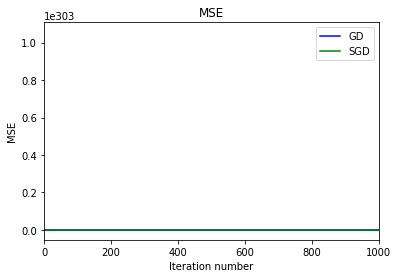

In [64]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [65]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

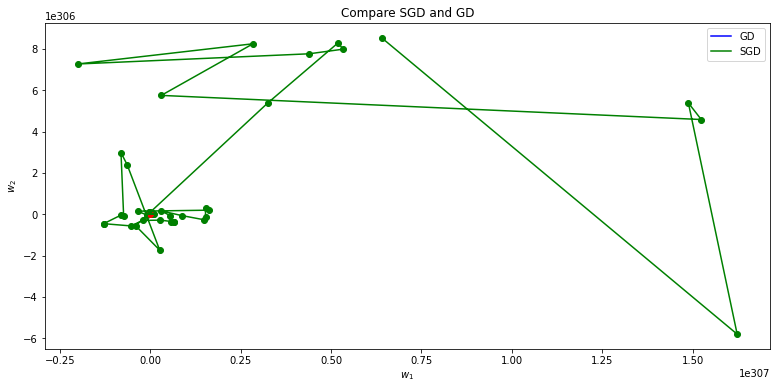

In [66]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()